# Prediction of Water Quality


### Dataset Source

The objective of this project is to construct a model to predict whether water is potable based on water quality measurements. The dataset used for this analysis can be found through the link below: <br>
[Prediction of Water Quality Dataset](https://www.kaggle.com/datasets/adityakadiwal/water-potability)

### Import Necessary Libraries

In [1]:
'''
Import the necessary libraries for the analysis.
'''
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import sklearn
import operator
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from collections import OrderedDict
from scipy.stats import shapiro
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
'''
Check the versions of the packages.
'''
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print('matplotlib version:', matplotlib.__version__)
print('sklearn:', sklearn.__version__)

numpy version: 1.20.3
pandas version: 1.3.4
seaborn version: 0.11.2
matplotlib version: 3.4.3
sklearn: 0.24.2


### Overview of Dataset

In [3]:
'''
Import the dataset.
Note: A copy of the CSV file was placed into the same directory as this notebook.
Utilize pd.read_csv() to read the file as a pandas data frame.
'''
df = pd.read_csv('water_potability.csv')

In [4]:
'''
Use head() function to display the first 10 rows of data of df.
'''
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.58385,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.50849,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [5]:
'''
Understand the shape of the dataset.
'''
print('There are {} rows and {} columns in this dataset.'.format(df.shape[0], df.shape[1]))

There are 3276 rows and 10 columns in this dataset.


In [6]:
'''
Display the total size of this dataset.
'''
print('This dataset contains {} records.'.format(df.size))

This dataset contains 32760 records.


In [7]:
'''
Find the type of data within each column initially.
'''
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [8]:
'''
Understand if there are any missing values in the dataset.
'''
df.isna().sum().sort_values(ascending = False)

Sulfate            781
ph                 491
Trihalomethanes    162
Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Turbidity            0
Potability           0
dtype: int64

In [9]:
'''
Understand how many missing values are in the dataset initially.
'''
missing_values = df.isna().sum().sum()
print('This dataset contains {} total missing values.'.format(missing_values))

This dataset contains 1434 total missing values.


The missing values are located within Sulfate, ph, and Trihalomethane features. There are 781, 491, and 162 missing values in each respective feature. This will need to be addressed during the Data Preparation step. 

### Highlights for Dataset Overview: 
<ul>
    <li> There are 3276 records and 10 features in the dataset.
    <li> There are 1434 missing values within Sulfate, ph, and Trihalomethanes features.
<ul>

### Data Understanding - Preliminary Preparation

In [10]:
'''
Revise the column headers for the dataset. 
Intended to make specific feature calls easier by converting to lowercase.
'''
column_names = ['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
               'organic_carbon', 'trihalomethanes', 'turbidity', 'potability']
df.columns = column_names

In [11]:
'''
Understand the descriptive statistics with describe() for the numeric features.
'''
df.describe()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [12]:
'''
Review the percentage of missing features for sulfate, ph, and trihalomethanes.
'''
perc_missing = round(df.isnull().sum() * 100 / len(df),2)
df_missing = pd.DataFrame({'feature': df.columns, 'percent_missing': perc_missing})
df_missing.sort_values(by= 'percent_missing', ascending = False)

,feature,percent_missing
sulfate,sulfate,23.84
ph,ph,14.99
trihalomethanes,trihalomethanes,4.95
hardness,hardness,0.00
solids,solids,0.00
chloramines,chloramines,0.00
conductivity,conductivity,0.00
organic_carbon,organic_carbon,0.00
turbidity,turbidity,0.00
potability,potability,0.00


Identify a plan on how to handle the missing values in sulfate, ph, and trihalomethane columns. Evaluate whether to replace the missing values (with mean or median) or remove the values from the data set.

In [13]:
'''
Evaluate the median for the missing values in the sulfate column for potable and non-potable water.
'''
df.groupby('potability')['sulfate'].median()

potability
0    333.389426
1    331.838167
Name: sulfate, dtype: float64

In [14]:
'''
Evaluate the mean for the missing values in the sulfate column for potable and non-potable water.
'''
df.groupby('potability')['sulfate'].mean()

potability
0    334.56429
1    332.56699
Name: sulfate, dtype: float64

In [15]:
'''
Evaluate the median for the missing values in the ph column for potable and non-potable water.
'''
df.groupby('potability')['ph'].median()

potability
0    7.035456
1    7.036752
Name: ph, dtype: float64

In [16]:
'''
Evaluate the mean for the missing values in the sulfate column for potable and non-potable water.
'''
df.groupby('potability')['ph'].mean()

potability
0    7.085378
1    7.073783
Name: ph, dtype: float64

In [17]:
'''
Evaluate the median for the missing values in the trihalomethanes column for potable and non-potable water.
'''
df.groupby('potability')['trihalomethanes'].median()

potability
0    66.542198
1    66.678214
Name: trihalomethanes, dtype: float64

In [18]:
'''
Evaluate the mean for the missing values in the trihalomethanes column for potable and non-potable water.
'''
df.groupby('potability')['trihalomethanes'].mean()

potability
0    66.303555
1    66.539684
Name: trihalomethanes, dtype: float64

Based on the descriptive statistics above, the mean or median may be a suitable choice to replace the features 
for each respective variables. As a result, I'll replace the sulfate, ph, and trihalomethane values with the median of each respective feature.

In [19]:
'''
Handle the missing values as described above. 
Replace the NaN values for sulfate, trihalomethanes, and ph with the median values of each respective feature.
Drop the remaining missing values from the sulfate column.
'''
df['sulfate'].fillna(value=df['sulfate'].median(), inplace = True)
df['trihalomethanes'].fillna(value=df['trihalomethanes'].median(), inplace = True)
df['ph'].fillna(value=df['ph'].median(), inplace = True)

In [20]:
'''
Show that all missing values have been replaced using same methodology as above.
'''
perc_missing_rev = round(df.isnull().sum() * 100 / len(df),2)
df_missing_rev = pd.DataFrame({'feature': df.columns, 'percent_missing': perc_missing_rev})
df_missing_rev.sort_values(by= 'percent_missing', ascending = False)

,feature,percent_missing
ph,ph,0.0
hardness,hardness,0.0
solids,solids,0.0
chloramines,chloramines,0.0
sulfate,sulfate,0.0
conductivity,conductivity,0.0
organic_carbon,organic_carbon,0.0
trihalomethanes,trihalomethanes,0.0
turbidity,turbidity,0.0
potability,potability,0.0


In [21]:
'''
Show the revised dataframe after preliminary prepearation steps. 
'''
df.head()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,7.036752,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Highlights for Preliminary Data Preparation: 
<ul>
    <li> Columns were renamed for convenience of analysis.
    <li> Descriptive statistics of each numeric variable were displayed.
    <li> Missing values for sulfate, ph, and trihalomethanes were replaced with the median values for each respective feature.
<ul>

### Data Understanding - Univariate Analysis

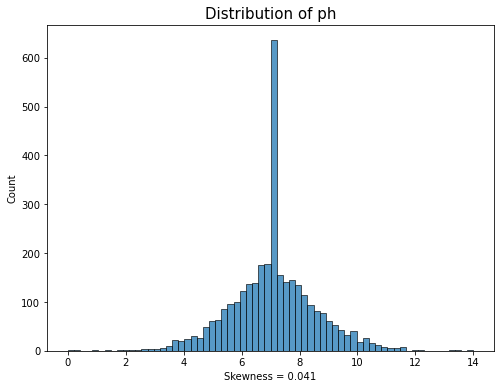

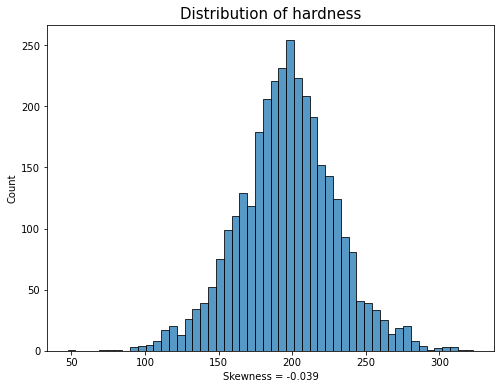

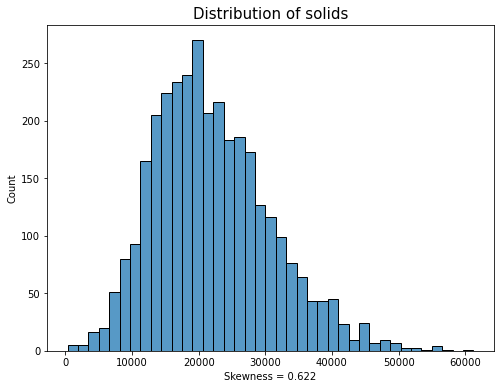

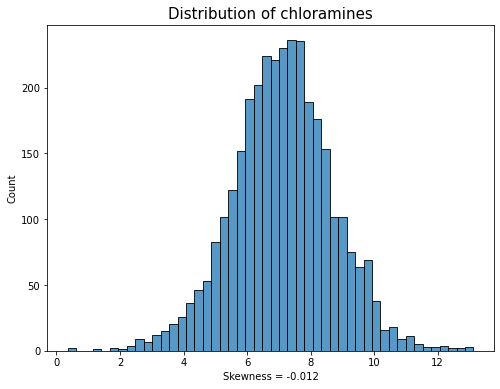

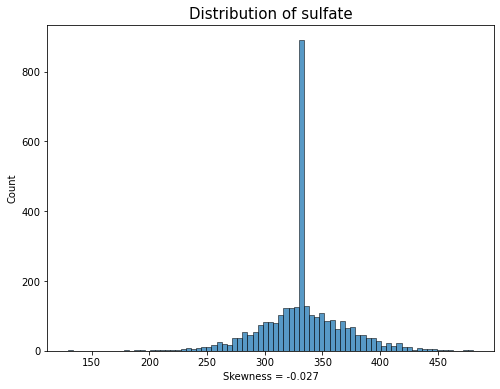

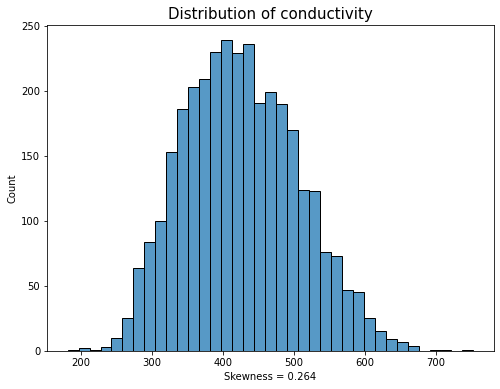

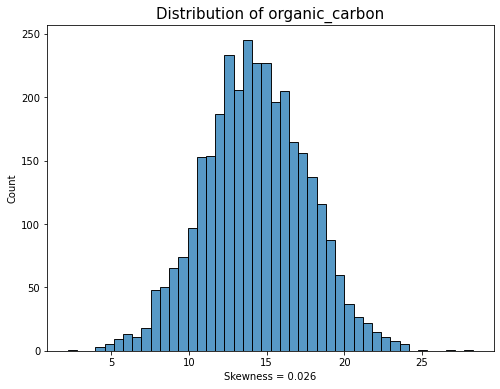

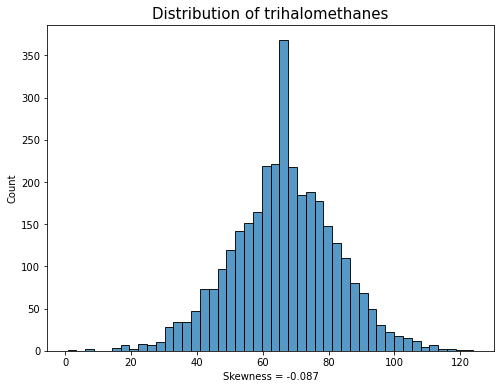

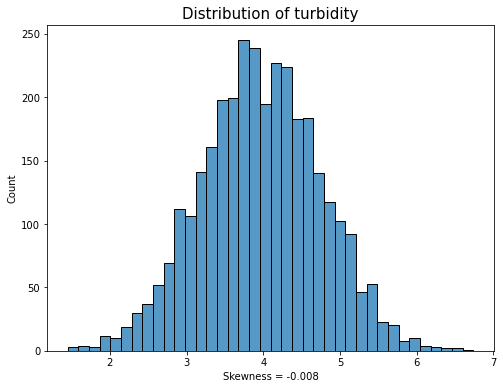

In [22]:
'''
Understand the distribution for the features within the dataset.
The code below will loop through each feature and illustrate how the feature is distributed.
The skewness value will also be included below the chart.
'''
revised_columns = df[['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
               'organic_carbon', 'trihalomethanes', 'turbidity']]

for col in revised_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(x =df[col]) 
    plt.title("Distribution of {}".format(col), fontsize=15) 
    plt.xlabel(f"Skewness = {round(df[col].skew(),3)}", fontsize=10) 
    plt.xticks(fontsize=10) 
    plt.yticks(fontsize=10)
    plt.show()

In [23]:
'''
Use describe() to understand the target variable descriptive statistics.
'''
df['potability'].value_counts()

0    1998
1    1278
Name: potability, dtype: int64

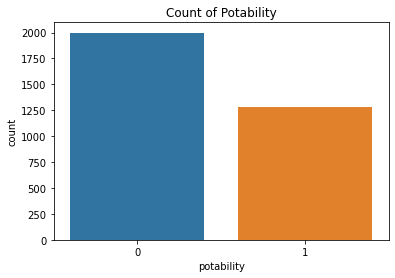

In [24]:
'''
Understand the balance of the 'potability' variable with a countplot.
The count will illustrate potable (1) and non-potable (0) records from the dataset.
'''
sns.countplot(x='potability', data = df).set(title = 'Count of Potability')
plt.show()

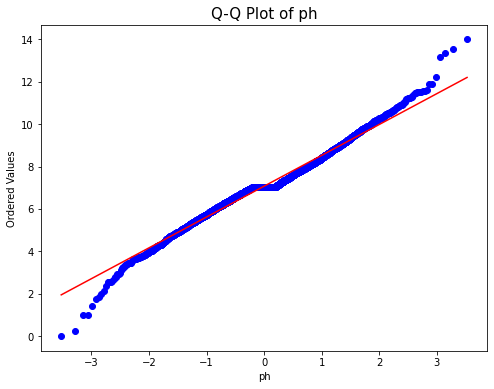

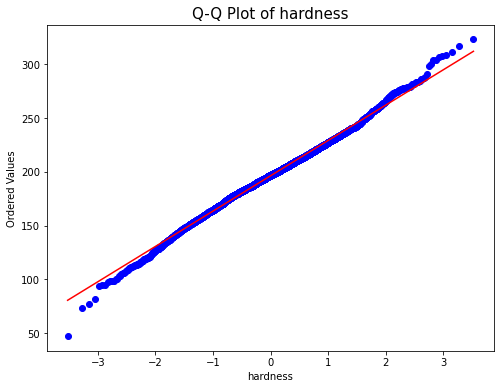

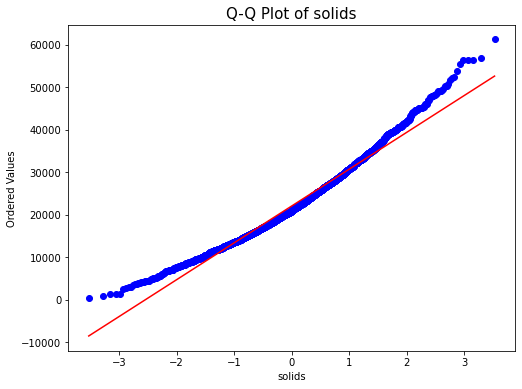

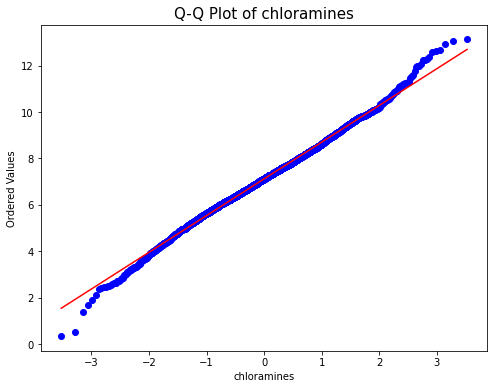

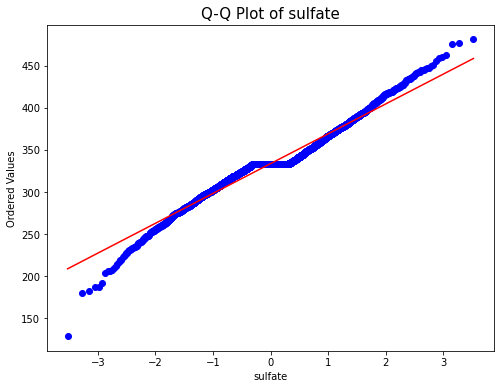

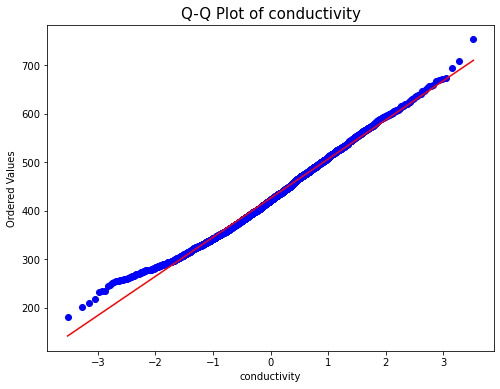

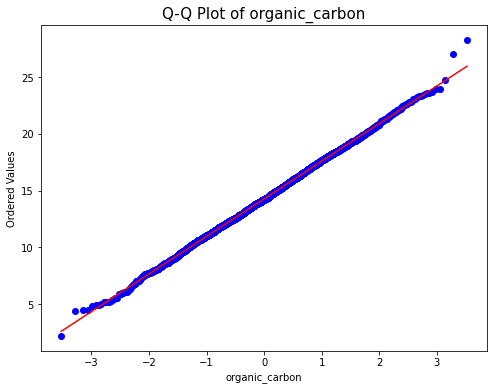

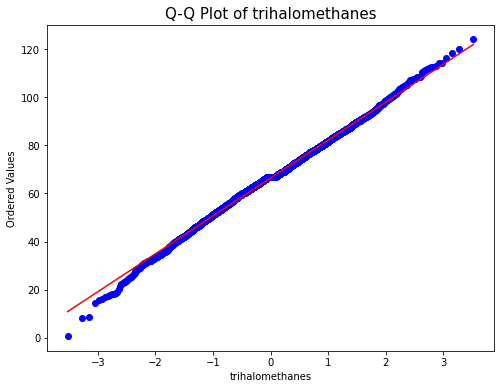

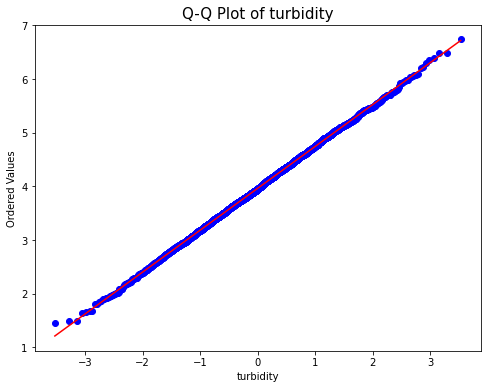

In [25]:
'''
Understand whether the features within the dataset are normally distributed with a Q-Q Plot.
The code below will loop through each feature and illustrate how the feature is distributed.
'''
revised_columns = df[['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
               'organic_carbon', 'trihalomethanes', 'turbidity']]

for col in revised_columns:
    plt.figure(figsize=(8,6))
    fig = stats.probplot(df[col], plot = sns.mpl.pyplot) 
    plt.title("Q-Q Plot of {}".format(col), fontsize=15) 
    plt.xlabel("{}".format(col), fontsize=10) 
    plt.xticks(fontsize=10) 
    plt.yticks(fontsize=10)
    plt.show()

In [26]:
'''
Run Shapiro-Wilk test for normality on the features.
'''
shapiro_test_ph = shapiro(df['ph'])
shapiro_test_hardness = shapiro(df['hardness'])
shapiro_test_solids = shapiro(df['solids'])
shapiro_test_chloramines = shapiro(df['chloramines'])
shapiro_test_sulfate = shapiro(df['sulfate'])
shapiro_test_conductivity = shapiro(df['conductivity'])
shapiro_test_oc = shapiro(df['organic_carbon'])
shapiro_test_trih = shapiro(df['trihalomethanes'])
shapiro_test_turbidity = shapiro(df['turbidity'])

normality_tests = {'ph_test':shapiro_test_ph, 'hardness_test':shapiro_test_hardness, 'solids_test':shapiro_test_solids,
                   'chloramines_test':shapiro_test_chloramines, 'sulfate_test':shapiro_test_sulfate, 
                   'conductivity_test':shapiro_test_conductivity, 'oc_test':shapiro_test_oc, 
                   'trih_test':shapiro_test_trih, 'turbidity_test':shapiro_test_turbidity}          
normality_tests

{'ph_test': ShapiroResult(statistic=0.9797217845916748, pvalue=3.0514745303663042e-21),
 'hardness_test': ShapiroResult(statistic=0.9959700703620911, pvalue=9.639764897428904e-08),
 'solids_test': ShapiroResult(statistic=0.9777269959449768, pvalue=2.955943348526295e-22),
 'chloramines_test': ShapiroResult(statistic=0.996772289276123, pvalue=1.8142625322070671e-06),
 'sulfate_test': ShapiroResult(statistic=0.9589979648590088, pvalue=1.8103824232042315e-29),
 'conductivity_test': ShapiroResult(statistic=0.9929702281951904, pvalue=1.5032647002199973e-11),
 'oc_test': ShapiroResult(statistic=0.9995213747024536, pvalue=0.6210277080535889),
 'trih_test': ShapiroResult(statistic=0.99696284532547, pvalue=3.835944426100468e-06),
 'turbidity_test': ShapiroResult(statistic=0.9996957778930664, pvalue=0.9306948781013489)}

In [27]:
'''
Identify outliers for each feature via 3 Sigma Method.
Code to identify outliers outside of +/- 3 Sigma of the Mean for each feature.
Record upper and lower levels.
'''
# PH Upper and lower
upper_ph = df['ph'].mean() + 3 * df['ph'].std()
lower_ph = df['ph'].mean() - 3 * df['ph'].std()

# Hardness upper and lower
upper_hardness = df['hardness'].mean() + 3 * df['hardness'].std()
lower_hardness = df['hardness'].mean() - 3 * df['hardness'].std()

# Solids Upper and Lower
upper_solids = df['solids'].mean() + 3 * df['solids'].std()
lower_solids = df['solids'].mean() - 3 * df['solids'].std()

# Chloramines Upper and Lower
upper_chloramines = df['chloramines'].mean() + 3 * df['chloramines'].std()
lower_chloramines = df['chloramines'].mean() - 3 * df['chloramines'].std()

# Sulfate Upper and Lower
upper_sulfate = df['sulfate'].mean() + 3 * df['sulfate'].std()
lower_sulfate = df['sulfate'].mean() - 3 * df['sulfate'].std()

# Conductivity Upper and Lower
upper_conductivity = df['conductivity'].mean() + 3 * df['conductivity'].std()
lower_conductivity = df['conductivity'].mean() - 3 * df['conductivity'].std()

# organic_carbon Upper and Lower
upper_organic_carbon = df['organic_carbon'].mean() + 3 * df['organic_carbon'].std()
lower_organic_carbon = df['organic_carbon'].mean() - 3 * df['organic_carbon'].std()


# Trihalomethanes Upper and Lower
upper_trihalomethanes = df['trihalomethanes'].mean() + 3 * df['trihalomethanes'].std()
lower_trihalomethanes = df['trihalomethanes'].mean() - 3 * df['trihalomethanes'].std()
# Trihalomethanes Upper and Lower

upper_turbidity = df['turbidity'].mean() + 3 * df['turbidity'].std()
lower_turbidity = df['turbidity'].mean() - 3 * df['turbidity'].std()

In [28]:
'''
Remove outliers outside of the +/- 3 Sigma range.
Commented code since there was not a significant impact observed on the best models.
'''
# df = df[(df['ph']>=lower_ph) & (df['ph']<=upper_ph) &
#       (df['hardness']>=lower_hardness) & (df['hardness']<=upper_hardness) &
#       (df['solids']>=lower_solids) & (df['solids']<=upper_solids) &
#       (df['chloramines']>=lower_chloramines) & (df['chloramines']<=upper_chloramines) &
#       (df['sulfate']>=lower_sulfate) & (df['sulfate']<=upper_sulfate) &
#       (df['conductivity']>=lower_conductivity) & (df['conductivity']<=upper_conductivity) &
#       (df['organic_carbon']>=lower_organic_carbon) & (df['organic_carbon']<=upper_organic_carbon) &
#       (df['trihalomethanes']>=lower_trihalomethanes) & (df['trihalomethanes']<=upper_trihalomethanes) &
#       (df['turbidity']>=lower_turbidity) & (df['turbidity']<=upper_turbidity)]

'\nRemove outliers outside of the +/- 3 Sigma range.\nCommented code since there was not a significant impact observed on the best models.\n'

### Data Understanding - Multivariate Analysis

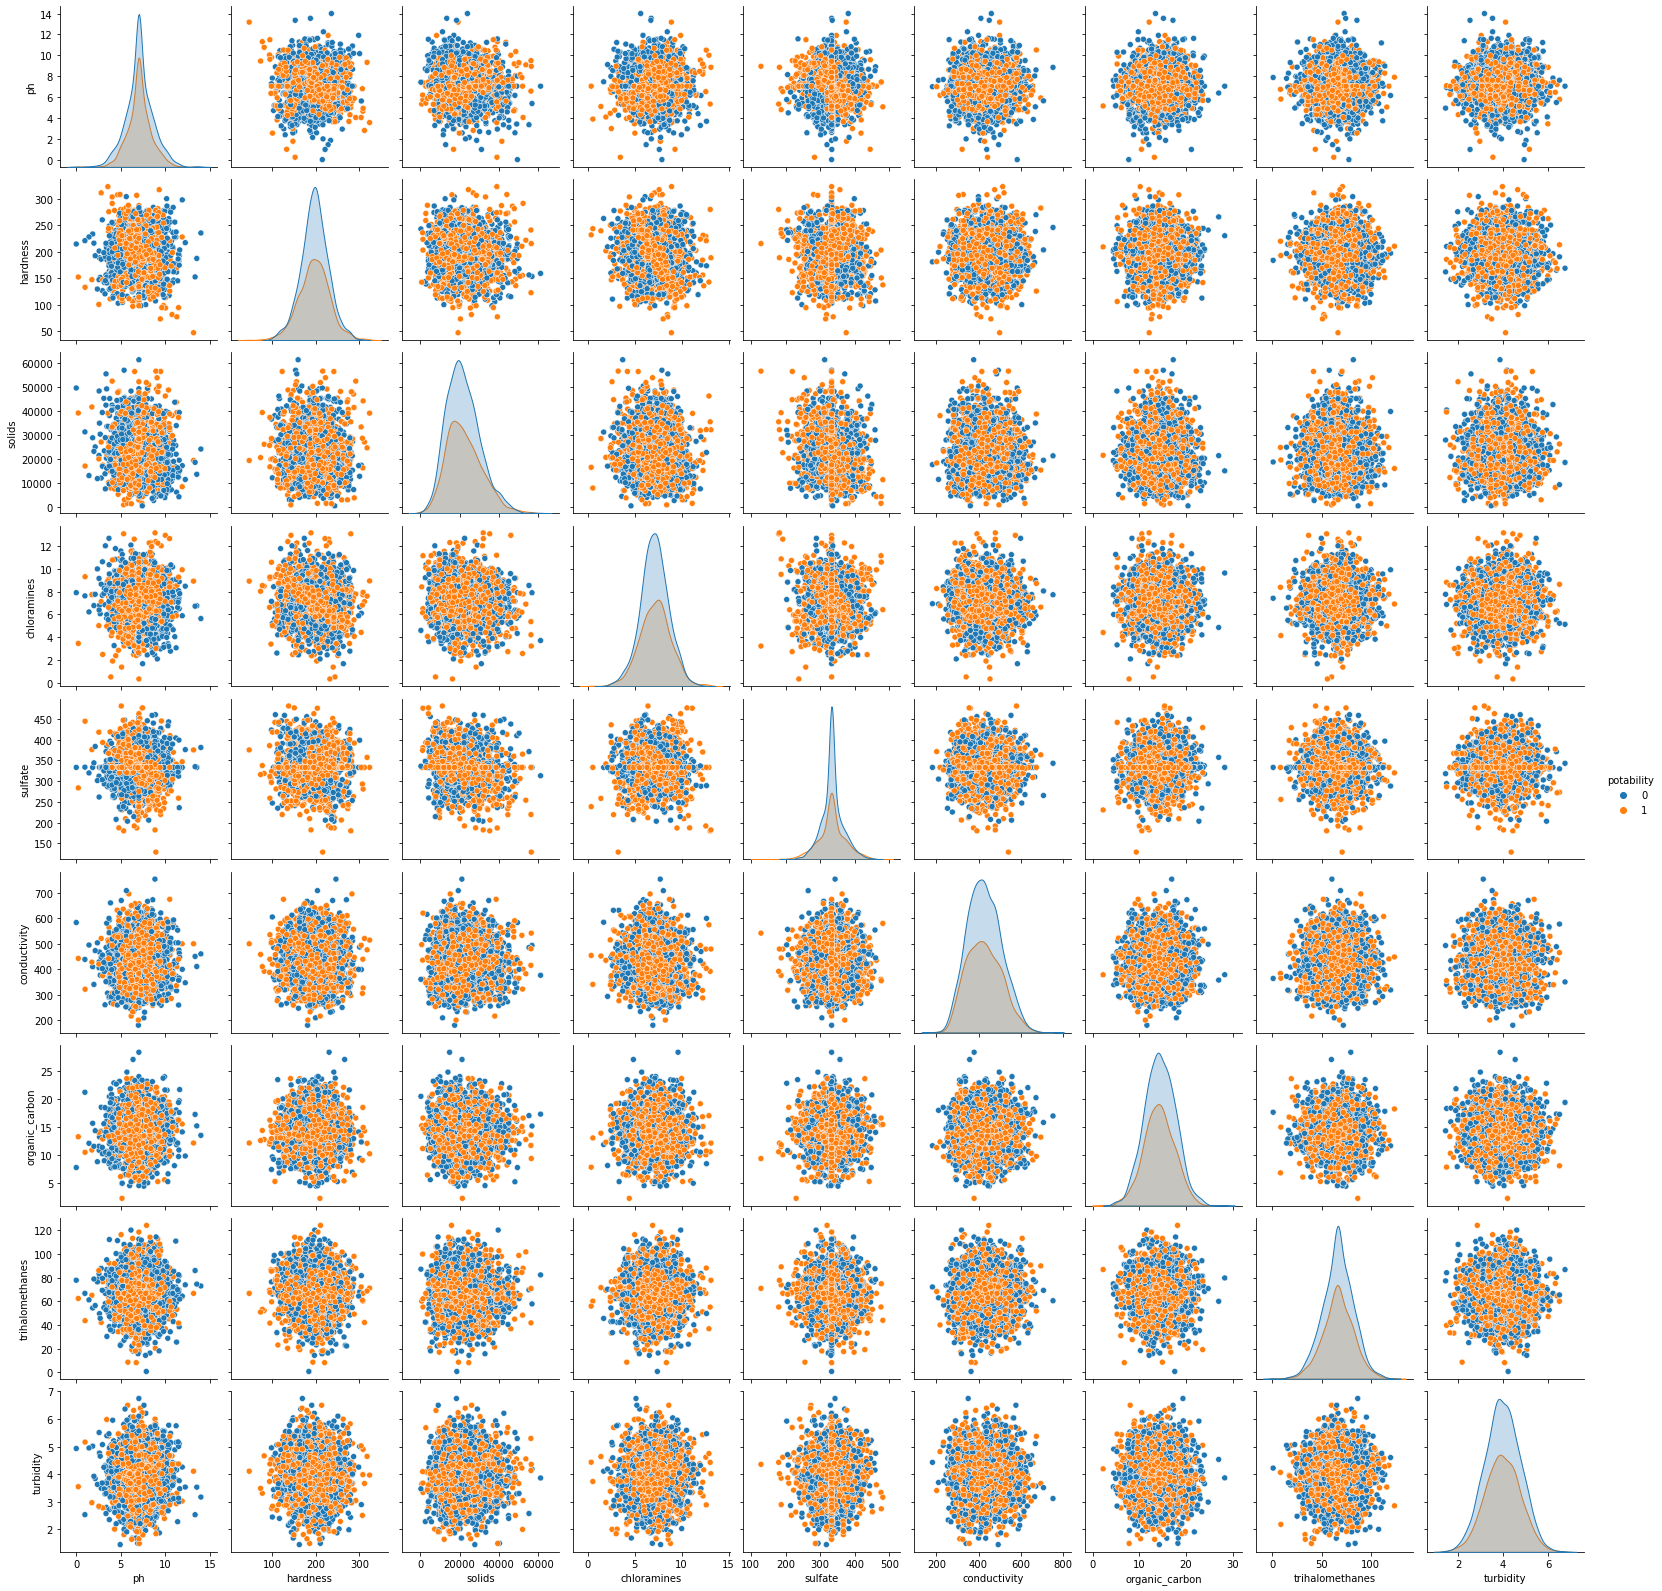

In [29]:
'''
Construct a pairplot() to illustrate bivariate relationships present in the dataset by potability.
'''
sns.pairplot(df, hue = 'potability')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap of Water Potability Dataset')

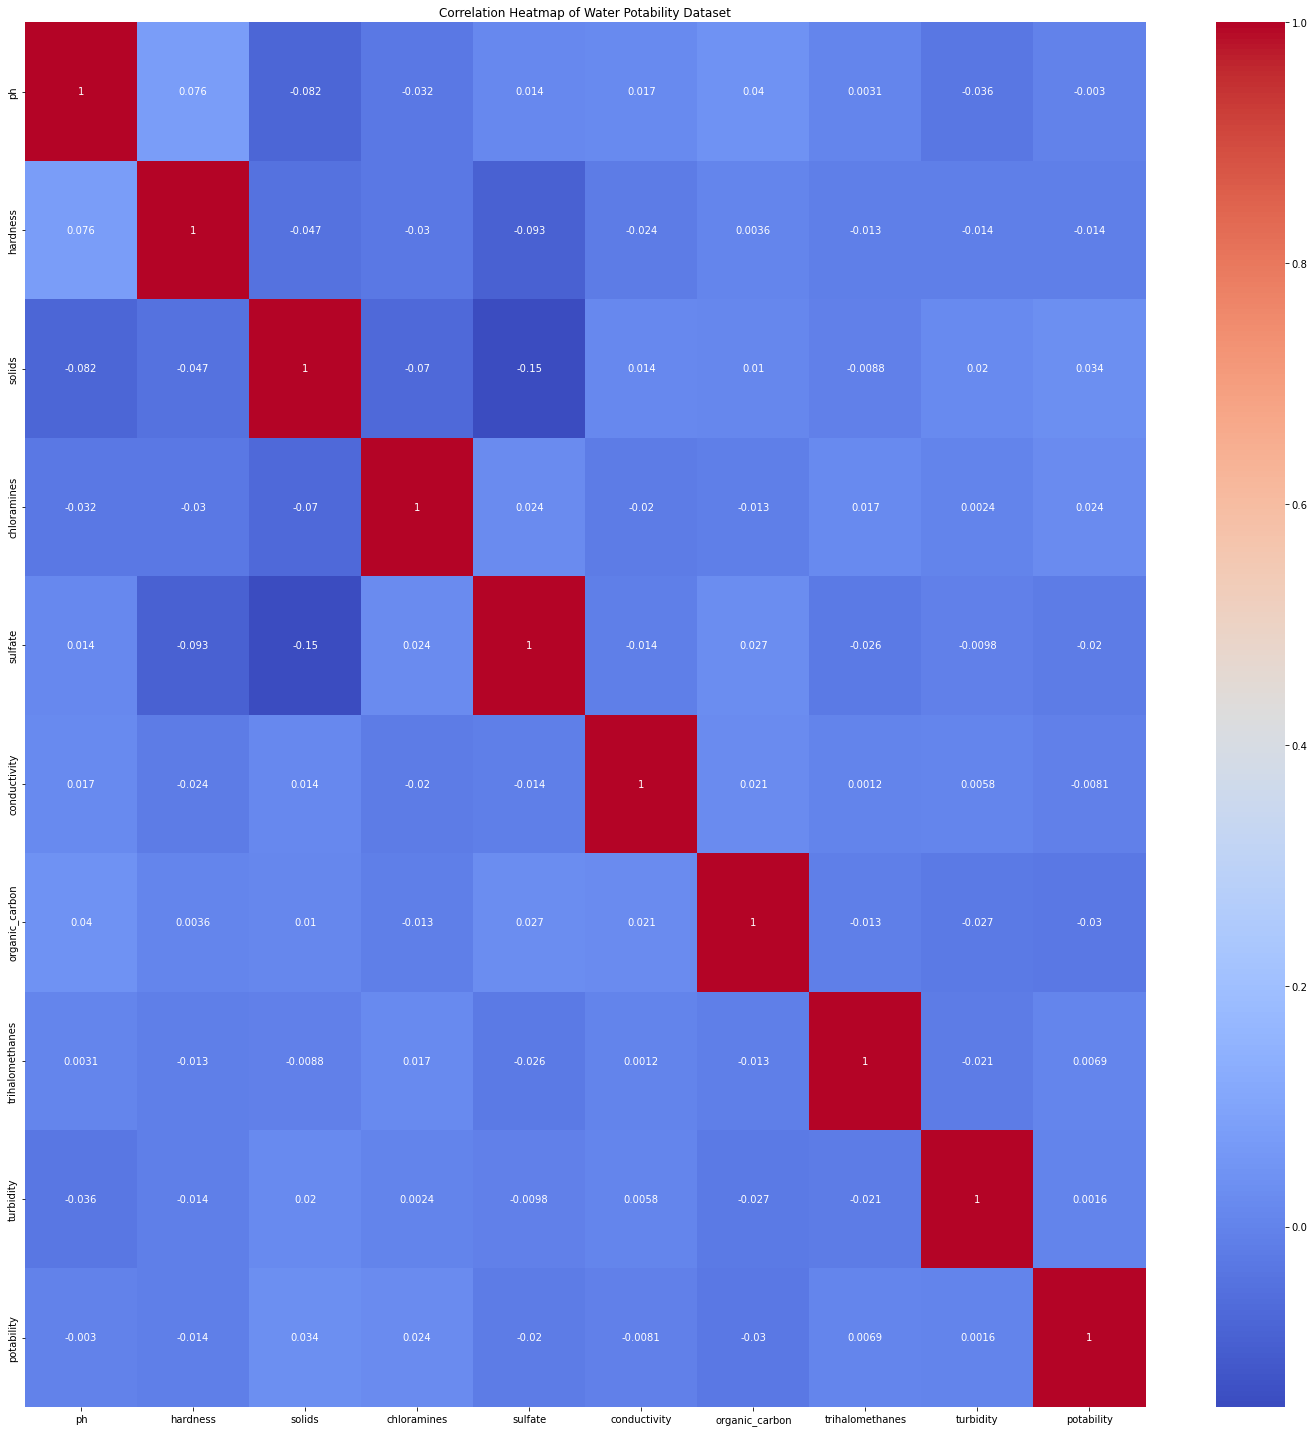

In [30]:
'''
Display a correlation heatmap. Utilize sns.heatmap() to generate the figure.
'''
# Calculate the correlation coefficient with corr().
correlation_number = df.corr()

# Create the heatmap for the correlation coefficients calculated above.
fig, ax = plt.subplots(1, 1, figsize=(20,20), tight_layout = True)
sns.heatmap(correlation_number, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap of Water Potability Dataset')

In [31]:
'''
Check pointbiserial correlations for potability to see if there are any significant differences from heatmap.
'''
# Calculate the correlation coefficient for features with potability.
correlation_number_pb1 = pointbiserialr(df['potability'],df['ph'])
correlation_number_pb2 = pointbiserialr(df['potability'],df['hardness'])
correlation_number_pb3 = pointbiserialr(df['potability'],df['solids'])
correlation_number_pb4 = pointbiserialr(df['potability'],df['chloramines'])
correlation_number_pb5 = pointbiserialr(df['potability'],df['sulfate'])
correlation_number_pb6 = pointbiserialr(df['potability'],df['conductivity'])
correlation_number_pb7 = pointbiserialr(df['potability'],df['organic_carbon'])
correlation_number_pb8 = pointbiserialr(df['potability'],df['trihalomethanes'])
correlation_number_pb9 = pointbiserialr(df['potability'],df['turbidity'])

# Create a dictionary of the pointbiserial correlation values.
pb_corr_dict = {'ph_corr':correlation_number_pb1, 'hardness_corr':correlation_number_pb2,
           'solids_corr':correlation_number_pb3, 'chloramines_corr':correlation_number_pb4, 
           'sulfate_corr':correlation_number_pb5, 'conductivity':correlation_number_pb6, 
           'organic_carbon_corr':correlation_number_pb7, 'trihalomethanes_corr':correlation_number_pb8,
           'turbidity_corr':correlation_number_pb9}
pb_corr_dict

{'ph_corr': PointbiserialrResult(correlation=-0.0030139288906728037, pvalue=0.8630909569723499),
 'hardness_corr': PointbiserialrResult(correlation=-0.013836558096163432, pvalue=0.42854158703761713),
 'solids_corr': PointbiserialrResult(correlation=0.033743313390906485, pvalue=0.05346363820366133),
 'chloramines_corr': PointbiserialrResult(correlation=0.0237789720027849, pvalue=0.1736102245030519),
 'sulfate_corr': PointbiserialrResult(correlation=-0.020476394607078924, pvalue=0.2413296939297576),
 'conductivity': PointbiserialrResult(correlation=-0.00812831972472755, pvalue=0.6418845484637925),
 'organic_carbon_corr': PointbiserialrResult(correlation=-0.030001366622918028, pvalue=0.08599746151306269),
 'trihalomethanes_corr': PointbiserialrResult(correlation=0.006886582826791652, pvalue=0.6935683946431569),
 'turbidity_corr': PointbiserialrResult(correlation=0.0015806819408441912, pvalue=0.9279391626737951)}

In [32]:
'''
Sort the dictionary by correlation value.
'''
sorted_dict = sorted(pb_corr_dict.items(), key = operator.itemgetter(1))
sorted_dict

[('organic_carbon_corr',
  PointbiserialrResult(correlation=-0.030001366622918028, pvalue=0.08599746151306269)),
 ('sulfate_corr',
  PointbiserialrResult(correlation=-0.020476394607078924, pvalue=0.2413296939297576)),
 ('hardness_corr',
  PointbiserialrResult(correlation=-0.013836558096163432, pvalue=0.42854158703761713)),
 ('conductivity',
  PointbiserialrResult(correlation=-0.00812831972472755, pvalue=0.6418845484637925)),
 ('ph_corr',
  PointbiserialrResult(correlation=-0.0030139288906728037, pvalue=0.8630909569723499)),
 ('turbidity_corr',
  PointbiserialrResult(correlation=0.0015806819408441912, pvalue=0.9279391626737951)),
 ('trihalomethanes_corr',
  PointbiserialrResult(correlation=0.006886582826791652, pvalue=0.6935683946431569)),
 ('chloramines_corr',
  PointbiserialrResult(correlation=0.0237789720027849, pvalue=0.1736102245030519)),
 ('solids_corr',
  PointbiserialrResult(correlation=0.033743313390906485, pvalue=0.05346363820366133))]

Text(0.5, 1.0, 'Correlation of Features with Water Potability')

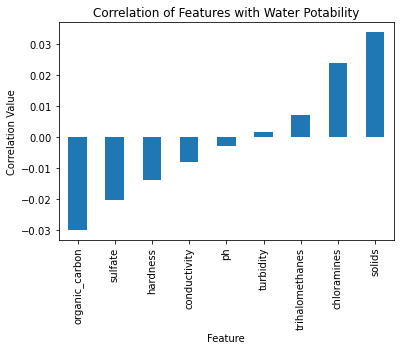

In [33]:
'''
Create a visual to show which features are most correlated with potability.
'''
df.corr()['potability'][:-1].sort_values().plot(kind='bar')
plt.xlabel("Feature")
plt.ylabel("Correlation Value")
plt.title("Correlation of Features with Water Potability")

<Figure size 576x288 with 0 Axes>

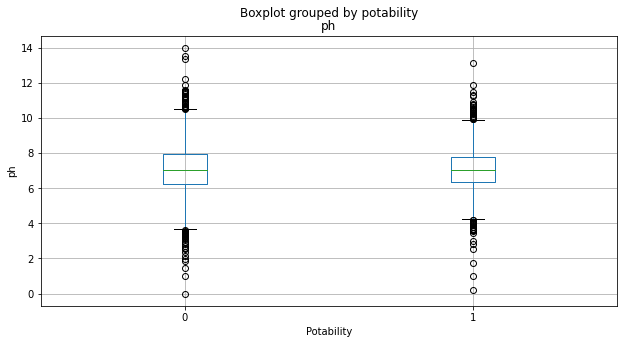

<Figure size 576x288 with 0 Axes>

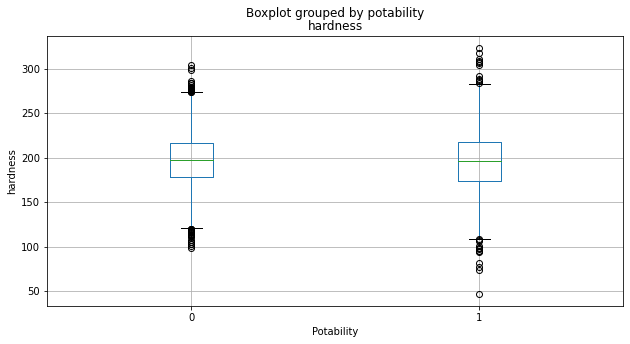

<Figure size 576x288 with 0 Axes>

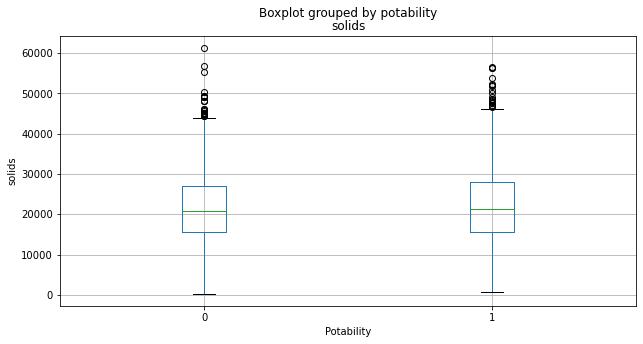

<Figure size 576x288 with 0 Axes>

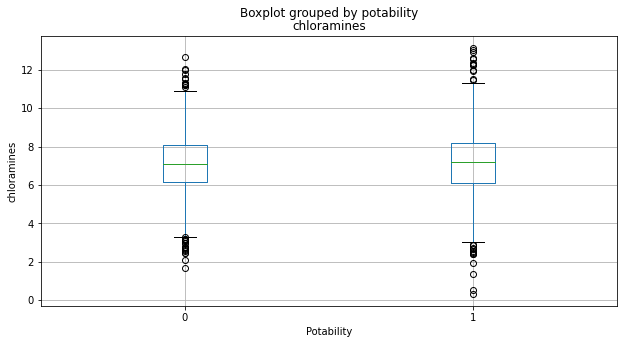

<Figure size 576x288 with 0 Axes>

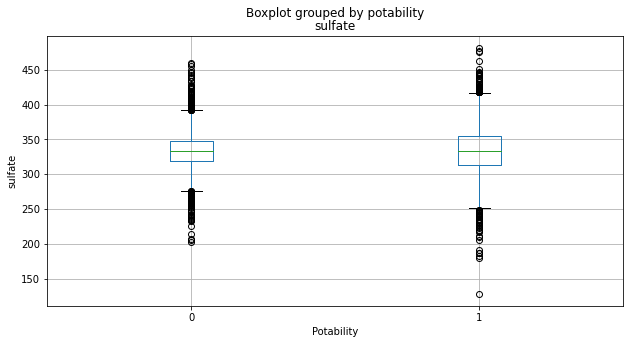

<Figure size 576x288 with 0 Axes>

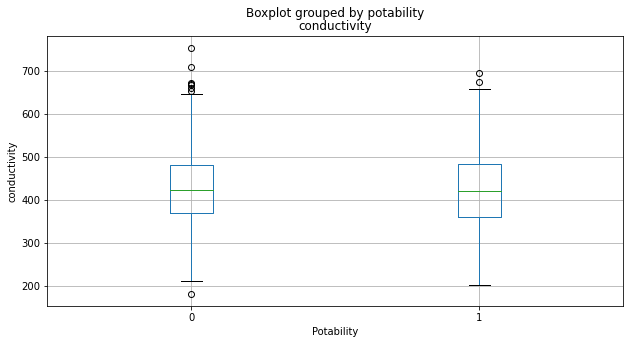

<Figure size 576x288 with 0 Axes>

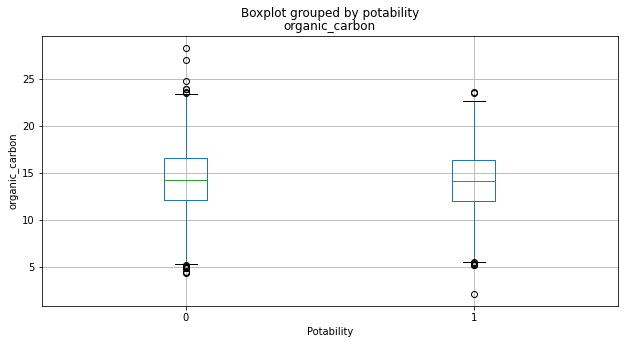

<Figure size 576x288 with 0 Axes>

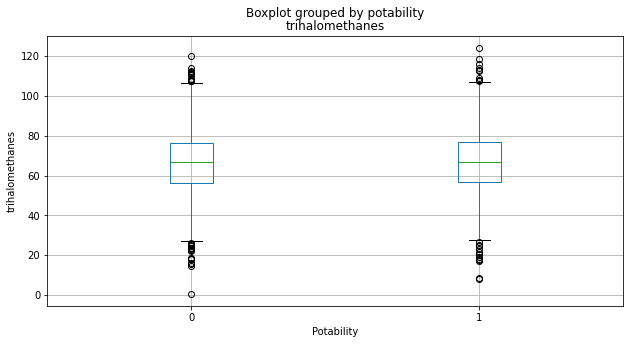

<Figure size 576x288 with 0 Axes>

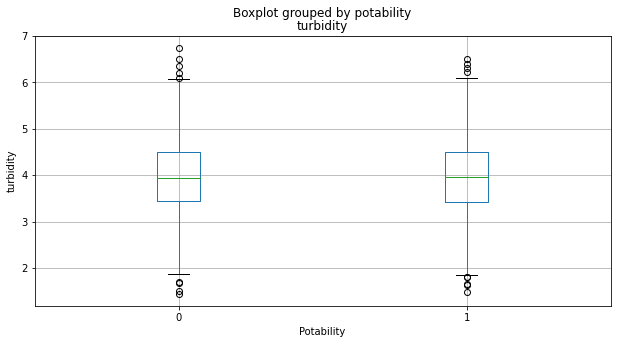

In [34]:
'''
Construct box plots to understand each feature distribution based on potability.
'''
for col in df.columns[0:9]:
    plt.figure(figsize=(8,4))
    df.boxplot(column=col, by='potability',figsize=(10,5))
    plt.xlabel("Potability".format(col), fontsize=10)
    plt.ylabel("{}".format(col), fontsize=10)
    plt.show()

### Data Preparation

In [35]:
'''
Split the data into training and test set, where 'potability' is the target.
'''
X = df.drop('potability', axis = 1)
y = df['potability']

In [36]:
'''
Split the data with train_test_split from sklearn.
Use test_size = 0.20 to split the data into 80% training and 20% testing data.
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
'''
Print out the shape of the resulting datasets for training and testing.
'''
print("The original data set shape was {} rows and {} columns.".format(df.shape[0],df.shape[1]))
print("The X_train shape is {} rows and {} columns.".format(X_train.shape[0],X_train.shape[1]))
print("The y_train shape is {} rows.".format(y_train.shape[0]))
print("The X_test shape is {} rows and {} columns.".format(X_test.shape[0],X_test.shape[1]))
print("The y_test shape is {} rows.".format(y_test.shape[0]))

The original data set shape was 3276 rows and 10 columns.
The X_train shape is 2620 rows and 9 columns.
The y_train shape is 2620 rows.
The X_test shape is 656 rows and 9 columns.
The y_test shape is 656 rows.


### Predictive Modeling and Evaluation

#### Logistic Regression Model

In [38]:
'''
Setup the Logistic Regression Classifier. 
Setting the class_weight to balanced.
'''
lr = LogisticRegression(solver = 'liblinear', multi_class='ovr', class_weight = 'balanced')

In [39]:
'''
Fit the Logistic Regression Classifier on the training dataset.
'''
lr_classifier = lr.fit(X_train, y_train)
lr_classifier

LogisticRegression(class_weight='balanced', multi_class='ovr',
                   solver='liblinear')

In [40]:
'''
Obtain the y_prediction probabilities for each record in the training dataset.
'''
y_predictions_lr_train = lr.predict(X_train)

In [41]:
'''
Generate a Confusion Matrix for the Logistic Regression Classifier based on the training dataset.
'''
cm_lr_train = confusion_matrix(y_train, y_predictions_lr_train)

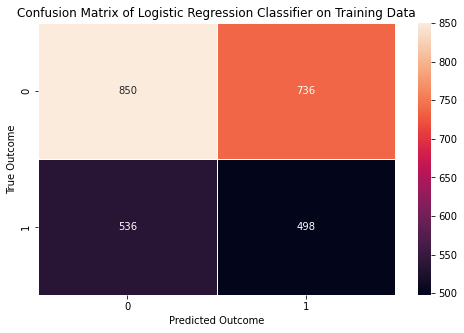

In [42]:
'''
Plot the confusion matrix so it is clearly labelled and illustrated.
'''
f, ax = plt.subplots(figsize = (8,5))
sns.heatmap(cm_lr_train, annot = True, linewidths = 0.5, fmt = ".0f", ax = ax)
plt.xlabel('Predicted Outcome')
plt.ylabel('True Outcome')
plt.title('Confusion Matrix of Logistic Regression Classifier on Training Data')
plt.show()

In [43]:
'''
Obtain the y_prediction probabilities for each record in the test dataset.
'''
y_predictions_lr_test = lr.predict(X_test)

In [44]:
'''
Generate a Confusion Matrix for the Logistic Regression Classifier based on the test dataset.
'''
cm_lr_test = confusion_matrix(y_test, y_predictions_lr_test)

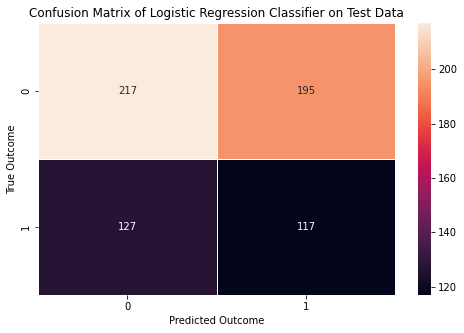

In [45]:
'''
Plot the confusion matrix so it is clearly labelled and illustrated.
'''
f, ax = plt.subplots(figsize = (8,5))
sns.heatmap(cm_lr_test, annot = True, linewidths = 0.5, fmt = ".0f", ax = ax)
plt.xlabel('Predicted Outcome')
plt.ylabel('True Outcome')
plt.title('Confusion Matrix of Logistic Regression Classifier on Test Data')
plt.show()

In [46]:
'''
Show the classification report for the test data.
'''
print(classification_report(y_test, y_predictions_lr_test))

              precision    recall  f1-score   support

           0       0.63      0.53      0.57       412
           1       0.38      0.48      0.42       244

    accuracy                           0.51       656
   macro avg       0.50      0.50      0.50       656
weighted avg       0.54      0.51      0.52       656



In [47]:
'''
Calculate the accuracy for the model based on training and test data. Also, report the
Precision, Recall, and F1 score for the model predications against the test data.
'''
accuracy_lr_train = accuracy_score(y_train, y_predictions_lr_train)
accuracy_lr_test = accuracy_score(y_test, y_predictions_lr_test)
precision_lr = precision_score(y_test, y_predictions_lr_test)
recall_lr = recall_score(y_test, y_predictions_lr_test)
f1_lr = f1_score(y_test, y_predictions_lr_test)
print("Accuracy of Logistic Regression Model on training data is:{}".format(accuracy_lr_train))
print("Accuracy of Logistic Regression Model on testing data is:{}".format(accuracy_lr_test))
print("Precision of Logistic Regression Model on testing data is:{}".format(precision_lr))
print("Recall of Logistic Regression Model on testing data is:{}".format(recall_lr))
print("F1 Score of Logistic Regression Model on testing data is:{}".format(f1_lr))

Accuracy of Logistic Regression Model on training data is:0.5145038167938931
Accuracy of Logistic Regression Model on testing data is:0.5091463414634146
Precision of Logistic Regression Model on testing data is:0.375
Recall of Logistic Regression Model on testing data is:0.47950819672131145
F1 Score of Logistic Regression Model on testing data is:0.4208633093525179


### Additional Data Preparation for Remaining Models

In [48]:
'''
Standardize the X_train and X_test datasets for the remainder of the models being evaluated.
'''
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### K-NN (K-Neareast Neighbor) Model

In [49]:
'''
Create the KNN Classifier.
K = 38 based on Error Rate evaluation shown in this section.
'''
knn = KNeighborsClassifier(n_neighbors = 38)

In [50]:
'''
Fit the KNN Classifier on the training dataset.
'''
knn_classifier = knn.fit(X_train, y_train )
knn_classifier

KNeighborsClassifier(n_neighbors=38)

In [51]:
'''
Obtain the y_prediction probabilities for each record in the training dataset.
'''
y_predictions_knn_train = knn.predict(X_train)

In [52]:
'''
Generate a Confusion Matrix for the Logistic Regression Classifier based on the training dataset.
'''
cm_knn_train = confusion_matrix(y_train, y_predictions_knn_train)

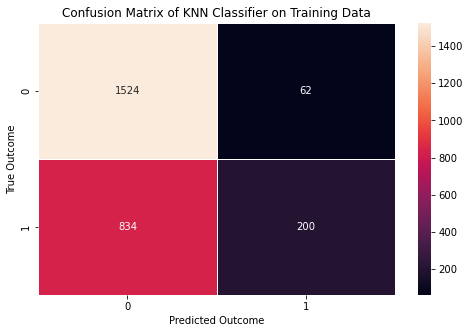

In [53]:
'''
Plot the confusion matrix so it is clearly labelled and illustrated.
'''
f, ax = plt.subplots(figsize = (8,5))
sns.heatmap(cm_knn_train, annot = True, linewidths = 0.5, fmt = ".0f", ax = ax)
plt.xlabel('Predicted Outcome')
plt.ylabel('True Outcome')
plt.title('Confusion Matrix of KNN Classifier on Training Data')
plt.show()

In [54]:
'''
Obtain the y_predictions for the KNN Classifier.
'''
y_predictions_knn_test = knn.predict(X_test)

In [55]:
'''
Generate a confusion matrix based on the test data set. 
'''
cm_knn = confusion_matrix(y_test, y_predictions_knn_test)
cm_knn

array([[393,  19],
       [201,  43]], dtype=int64)

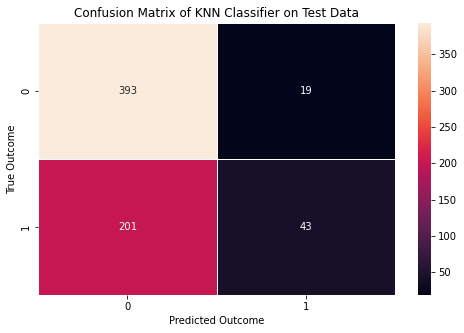

In [56]:
'''
Plot the confusion matrix so it is clearly labelled and illustrated.
'''
f, ax = plt.subplots(figsize = (8,5))
sns.heatmap(cm_knn, annot = True, linewidths = 0.5, fmt = ".0f", ax = ax)
plt.xlabel('Predicted Outcome')
plt.ylabel('True Outcome')
plt.title('Confusion Matrix of KNN Classifier on Test Data')
plt.show()

In [57]:
'''
Show the classification report for the test data.
'''
print(classification_report(y_test, y_predictions_knn_test))

              precision    recall  f1-score   support

           0       0.66      0.95      0.78       412
           1       0.69      0.18      0.28       244

    accuracy                           0.66       656
   macro avg       0.68      0.57      0.53       656
weighted avg       0.67      0.66      0.60       656



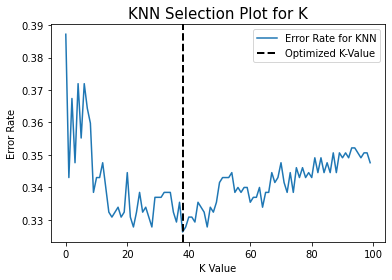

In [58]:
'''
Choose an optimal K value for KNN by plotting the error rate for the model against the data.
'''
# Create an empty list for error rate.
error_rate = []

# Create a for loop to get error rates appended to the error_rate list.
for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(X_train, y_train)

    new_predictions = new_model.predict(X_test)

    error_rate.append(np.mean(new_predictions != y_test))
    
# Create the plot to assist with selecting a K value for the KNN classifier.
plt.plot(error_rate, label = 'Error Rate for KNN')
plt.title("KNN Selection Plot for K", fontsize=15) 
plt.xlabel("K Value", fontsize=10)
plt.ylabel("Error Rate", fontsize=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.axvline(x=pd.Series(error_rate).idxmin(), linewidth = 2, color = 'k', linestyle = '--', label = 'Optimized K-Value')
plt.legend(loc = 'upper right')
plt.show()

In [59]:
'''
Show the optimum number of K based on the plot above.
'''
print('Optimum K-Value for KNN:{}'.format(pd.Series(error_rate).idxmin()))

Optimum K-Value for KNN:38


In [60]:
'''
Calculate the accuracy for the model based on training and test data. Also, report the
Precision, Recall, and F1 score for the model predications against the test data.
'''
accuracy_knn_train = accuracy_score(y_train, y_predictions_knn_train)
accuracy_knn_test = accuracy_score(y_test, y_predictions_knn_test)
precision_knn = precision_score(y_test, y_predictions_knn_test)
recall_knn = recall_score(y_test, y_predictions_knn_test)
f1_knn = f1_score(y_test, y_predictions_knn_test)
print("Accuracy of KNN Model on training data is:{}".format(accuracy_knn_train))
print("Accuracy of KNN Model on testing data is:{}".format(accuracy_knn_test))
print("Precision of KNN Model on testing data is:{}".format(precision_knn))
print("Recall of KNN Model on testing data is:{}".format(recall_knn))
print("F1 Score of KNN Model on testing data is:{}".format(f1_knn))

Accuracy of KNN Model on training data is:0.6580152671755726
Accuracy of KNN Model on testing data is:0.6646341463414634
Precision of KNN Model on testing data is:0.6935483870967742
Recall of KNN Model on testing data is:0.1762295081967213
F1 Score of KNN Model on testing data is:0.28104575163398693


#### Decision Tree Model

In [61]:
'''
Create the Decision Tree Classifier.
'''
dt = DecisionTreeClassifier()

In [62]:
'''
Fit the Decision Tree Classifier on the training dataset.
'''
decision_tree_classifier = dt.fit(X_train, y_train )
decision_tree_classifier

DecisionTreeClassifier()

In [63]:
'''
Obtain the y_prediction probabilities for each record in the training dataset.
'''
y_predictions_dt_train = dt.predict(X_train)

In [64]:
'''
Generate a Confusion Matrix for the Decision Tree Classifier based on the training dataset.
'''
cm_dt_train = confusion_matrix(y_train, y_predictions_dt_train)

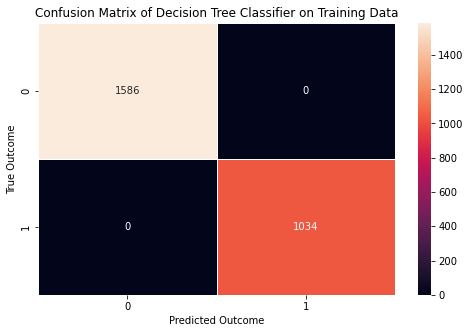

In [65]:
'''
Plot the confusion matrix so it is clearly labelled and illustrated.
'''
f, ax = plt.subplots(figsize = (8,5))
sns.heatmap(cm_dt_train, annot = True, linewidths = 0.5, fmt = ".0f", ax = ax)
plt.xlabel('Predicted Outcome')
plt.ylabel('True Outcome')
plt.title('Confusion Matrix of Decision Tree Classifier on Training Data')
plt.show()

In [66]:
'''
Obtain the y_predictions for the decision tree classifier.
'''
y_predictions_dt_test = dt.predict(X_test)

In [67]:
'''
Generate a confusion matrix based on the test data set. 
'''
cm_dt = confusion_matrix(y_test, y_predictions_dt_test)
cm_dt

array([[261, 151],
       [118, 126]], dtype=int64)

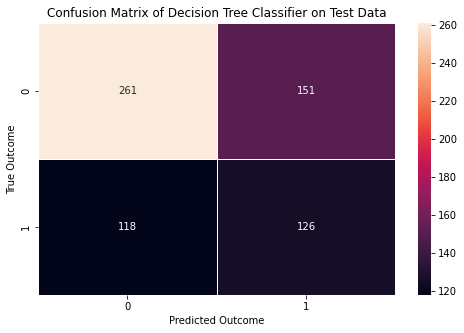

In [68]:
'''
Plot the confusion matrix so it is clearly labelled and illustrated.
'''
f, ax = plt.subplots(figsize = (8,5))
sns.heatmap(cm_dt, annot = True, linewidths = 0.5, fmt = ".0f", ax = ax)
plt.xlabel('Predicted Outcome')
plt.ylabel('True Outcome')
plt.title('Confusion Matrix of Decision Tree Classifier on Test Data')
plt.show()

In [69]:
'''
Show the classification report for the test data.
'''
print(classification_report(y_test ,y_predictions_dt_test))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66       412
           1       0.45      0.52      0.48       244

    accuracy                           0.59       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.60      0.59      0.59       656



In [70]:
'''
Calculate the accuracy for the model based on training and test data. Also, report the
Precision, Recall, and F1 score for the model predications against the test data.
'''
accuracy_dt_train = accuracy_score(y_train, y_predictions_dt_train)
accuracy_dt_test = accuracy_score(y_test, y_predictions_dt_test)
precision_dt = precision_score(y_test, y_predictions_dt_test)
recall_dt = recall_score(y_test, y_predictions_dt_test)
f1_dt = f1_score(y_test, y_predictions_dt_test)
print("Accuracy of Decision Tree Model on training data is:{}".format(accuracy_dt_train))
print("Accuracy of Decision Tree Model on testing data is:{}".format(accuracy_dt_test))
print("Precision of Decision Tree Model on testing data is:{}".format(precision_dt))
print("Recall of Decision Tree Model on testing data is:{}".format(recall_dt))
print("F1 Score of Decision Tree Model on testing data is:{}".format(f1_dt))

Accuracy of Decision Tree Model on training data is:1.0
Accuracy of Decision Tree Model on testing data is:0.5899390243902439
Precision of Decision Tree Model on testing data is:0.4548736462093863
Recall of Decision Tree Model on testing data is:0.5163934426229508
F1 Score of Decision Tree Model on testing data is:0.48368522072936665


#### Random Forest Model

In [71]:
'''
Create the Random Forest Classifier.
Select number of estimators based on error reduction plot for this model.
'''
rf = RandomForestClassifier(n_estimators = 2)

In [72]:
'''
Fit the Random Forest Classifier on the training dataset.
'''
random_forest_classifier = rf.fit(X_train, y_train )
random_forest_classifier

RandomForestClassifier(n_estimators=78)

In [73]:
'''
Obtain the y_prediction probabilities for each record in the training dataset.
'''
y_predictions_rf_train = rf.predict(X_train)

In [74]:
'''
Generate a Confusion Matrix for the Random Forest Classifier based on the training dataset.
'''
cm_rf_train = confusion_matrix(y_train, y_predictions_rf_train)

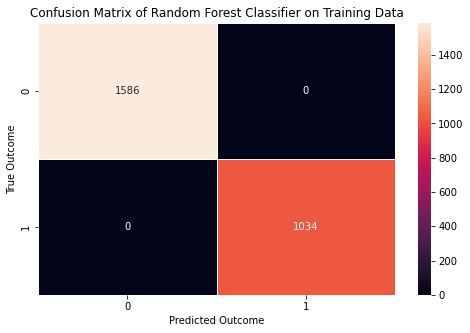

In [75]:
'''
Plot the confusion matrix so it is clearly labelled and illustrated.
'''
f, ax = plt.subplots(figsize = (8,5))
sns.heatmap(cm_rf_train, annot = True, linewidths = 0.5, fmt = ".0f", ax = ax)
plt.xlabel('Predicted Outcome')
plt.ylabel('True Outcome')
plt.title('Confusion Matrix of Random Forest Classifier on Training Data')
plt.show()

In [76]:
'''
Obtain the y_predictions for the Random Forest classifier.
'''
y_predictions_rf_test = rf.predict(X_test)

In [77]:
'''
Generate a confusion matrix based on the test data set. 
'''
cm_rf = confusion_matrix(y_test, y_predictions_rf_test)
cm_rf

array([[355,  57],
       [164,  80]], dtype=int64)

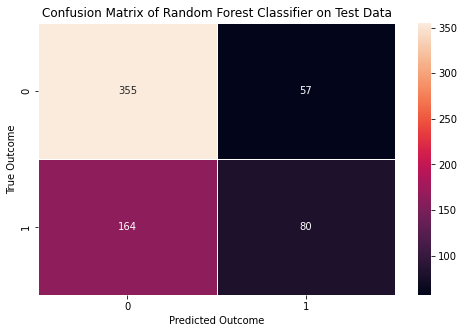

In [78]:
'''
Plot the confusion matrix so it is clearly labelled and illustrated.
'''
f, ax = plt.subplots(figsize = (8,5))
sns.heatmap(cm_rf, annot = True, linewidths = 0.5, fmt = ".0f", ax = ax)
plt.xlabel('Predicted Outcome')
plt.ylabel('True Outcome')
plt.title('Confusion Matrix of Random Forest Classifier on Test Data')
plt.show()

In [79]:
'''
Show the classification report for the test data.
'''
print(classification_report(y_test ,y_predictions_rf_test))

              precision    recall  f1-score   support

           0       0.68      0.86      0.76       412
           1       0.58      0.33      0.42       244

    accuracy                           0.66       656
   macro avg       0.63      0.59      0.59       656
weighted avg       0.65      0.66      0.64       656



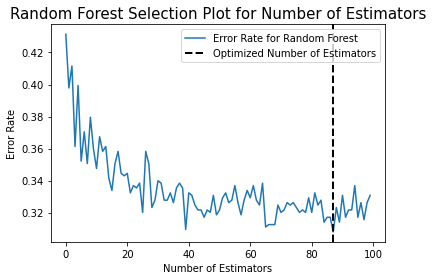

In [80]:
'''
Choose an optimal number of estimators for Random Forest by plotting the error rate for the model against the data.
'''
# Create an empty list for error rate.
error_rate_rf = []

# Create a for loop to get error rates appended to the error_rate list.
for i in np.arange(1, 101):

    new_model = RandomForestClassifier(n_estimators = i)

    new_model.fit(X_train, y_train)

    new_predictions = new_model.predict(X_test)

    error_rate_rf.append(np.mean(new_predictions != y_test))
    
# Create the plot to assist with selecting a K value for the KNN classifier.
plt.plot(error_rate_rf, label = 'Error Rate for Random Forest')
plt.title("Random Forest Selection Plot for Number of Estimators", fontsize=15) 
plt.xlabel("Number of Estimators", fontsize=10)
plt.ylabel("Error Rate", fontsize=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.axvline(x=pd.Series(error_rate_rf).idxmin(), linewidth = 2, color = 'k', linestyle = '--',
            label = 'Optimized Number of Estimators')
plt.legend(loc = 'upper right')
plt.show()

In [81]:
'''
Show the optimum number of estimators on the plot above.
'''
print('Optimum number of estimators for Random Forest:{}'.format(pd.Series(error_rate_rf).idxmin()))

Optimum number of estimators for Random Forest:87


In [82]:
'''
Calculate the accuracy for the model based on training and test data. Also, report the
Precision, Recall, and F1 score for the model predications against the test data.
'''
accuracy_rf_train = accuracy_score(y_train, y_predictions_rf_train)
accuracy_rf_test = accuracy_score(y_test, y_predictions_rf_test)
precision_rf = precision_score(y_test, y_predictions_rf_test)
recall_rf = recall_score(y_test, y_predictions_rf_test)
f1_rf = f1_score(y_test, y_predictions_rf_test)
print("Accuracy of Random Forest Model on training data is:{}".format(accuracy_rf_train))
print("Accuracy of Random Forest Model on testing data is:{}".format(accuracy_rf_test))
print("Precision of Random Forest Model on testing data is:{}".format(precision_rf))
print("Recall of Random Forest Model on testing data is:{}".format(recall_rf))
print("F1 Score of Random Forest Model on testing data is:{}".format(f1_rf))

Accuracy of Random Forest Model on training data is:1.0
Accuracy of Random Forest Model on testing data is:0.663109756097561
Precision of Random Forest Model on testing data is:0.583941605839416
Recall of Random Forest Model on testing data is:0.32786885245901637
F1 Score of Random Forest Model on testing data is:0.41994750656167973


#### Support Vector Machine (SVM) Model

In [83]:
'''
Create the SVM Classifier.
'''
svm = SVC()

In [84]:
'''
Fit the SVM Classifier on the training dataset.
'''
svm_classifier = svm.fit(X_train, y_train )
svm_classifier

SVC()

In [85]:
'''
Obtain the y_predictions for the SVM Classifier.
'''
y_predictions_svm = svm.predict(X_test)

In [86]:
'''
Obtain the y_prediction probabilities for each record in the training dataset.
'''
y_predictions_svm_train = svm.predict(X_train)

In [87]:
'''
Generate a Confusion Matrix for the Support Vector Machine Model based on the training dataset.
'''
cm_svm_train = confusion_matrix(y_train, y_predictions_svm_train)

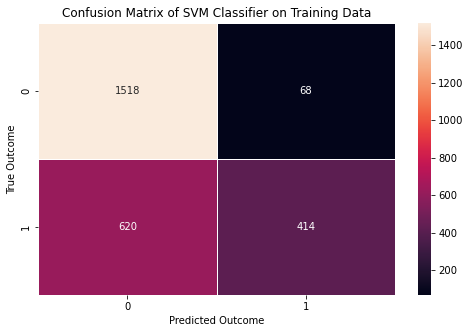

In [88]:
'''
Plot the confusion matrix so it is clearly labelled and illustrated.
'''
f, ax = plt.subplots(figsize = (8,5))
sns.heatmap(cm_svm_train, annot = True, linewidths = 0.5, fmt = ".0f", ax = ax)
plt.xlabel('Predicted Outcome')
plt.ylabel('True Outcome')
plt.title('Confusion Matrix of SVM Classifier on Training Data')
plt.show()

In [89]:
'''
Obtain the y_predictions for the SVM classifier.
'''
y_predictions_svm_test = svm.predict(X_test)

In [90]:
'''
Generate a confusion matrix based on the test data set. 
'''
cm_svm = confusion_matrix(y_test, y_predictions_svm_test)
cm_svm

array([[375,  37],
       [166,  78]], dtype=int64)

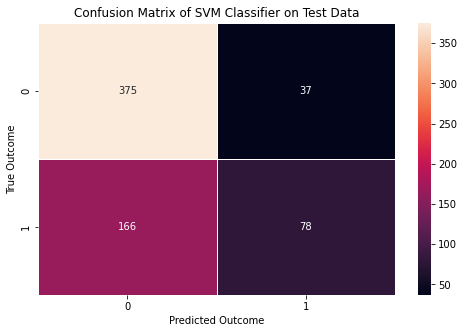

In [91]:
'''
Plot the confusion matrix so it is clearly labelled and illustrated.
'''
f, ax = plt.subplots(figsize = (8,5))
sns.heatmap(cm_svm, annot = True, linewidths = 0.5, fmt = ".0f", ax = ax)
plt.xlabel('Predicted Outcome')
plt.ylabel('True Outcome')
plt.title('Confusion Matrix of SVM Classifier on Test Data')
plt.show()

In [92]:
'''
Show the classification report for the test data.
'''
print(classification_report(y_test ,y_predictions_svm_test))

              precision    recall  f1-score   support

           0       0.69      0.91      0.79       412
           1       0.68      0.32      0.43       244

    accuracy                           0.69       656
   macro avg       0.69      0.61      0.61       656
weighted avg       0.69      0.69      0.66       656



In [93]:
'''
Calculate the accuracy for the model based on training and test data. Also, report the
Precision, Recall, and F1 score for the model predications against the test data.
'''
accuracy_svm_train = accuracy_score(y_train, y_predictions_svm_train)
accuracy_svm_test = accuracy_score(y_test, y_predictions_svm_test)
precision_svm = precision_score(y_test, y_predictions_svm_test)
recall_svm = recall_score(y_test, y_predictions_svm_test)
f1_svm = f1_score(y_test, y_predictions_svm_test)
print("Accuracy of SVM Model on training data is:{}".format(accuracy_svm_train))
print("Accuracy of SVM Model on testing data is:{}".format(accuracy_svm_test))
print("Precision of SVM Model on testing data is:{}".format(precision_svm))
print("Recall of SVM Model on testing data is:{}".format(recall_svm))
print("F1 Score of SVM Model on testing data is:{}".format(f1_svm))

Accuracy of SVM Model on training data is:0.7374045801526717
Accuracy of SVM Model on testing data is:0.6905487804878049
Precision of SVM Model on testing data is:0.6782608695652174
Recall of SVM Model on testing data is:0.319672131147541
F1 Score of SVM Model on testing data is:0.43454038997214484


#### Adaboost Model

In [111]:
'''
Create the Adaboost Classifier.
Choose n_estimators = 20 based on error reduction plot shown in this section.
'''
adaboost = AdaBoostClassifier(n_estimators=20)

In [112]:
'''
Fit the Adaboost Classifier on the training dataset.
'''
adaboost_classifier = adaboost.fit(X_train, y_train )
adaboost_classifier

AdaBoostClassifier(n_estimators=20)

In [113]:
'''
Obtain the y_prediction probabilities for each record in the training dataset.
'''
y_predictions_adaboost_train = adaboost.predict(X_train)

In [114]:
'''
Generate a Confusion Matrix for the AdaBoost Model based on the training dataset.
'''
cm_adaboost_train = confusion_matrix(y_train, y_predictions_adaboost_train)

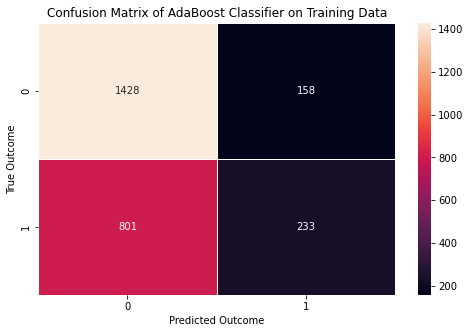

In [115]:
'''
Plot the confusion matrix so it is clearly labelled and illustrated.
'''
f, ax = plt.subplots(figsize = (8,5))
sns.heatmap(cm_adaboost_train, annot = True, linewidths = 0.5, fmt = ".0f", ax = ax)
plt.xlabel('Predicted Outcome')
plt.ylabel('True Outcome')
plt.title('Confusion Matrix of AdaBoost Classifier on Training Data')
plt.show()

In [116]:
'''
Obtain the y_predictions for the SVM classifier.
'''
y_predictions_adaboost_test = adaboost.predict(X_test)

In [117]:
'''
Generate a confusion matrix based on the test data set. 
'''
cm_adaboost = confusion_matrix(y_test, y_predictions_adaboost_test)
cm_adaboost

array([[375,  37],
       [198,  46]], dtype=int64)

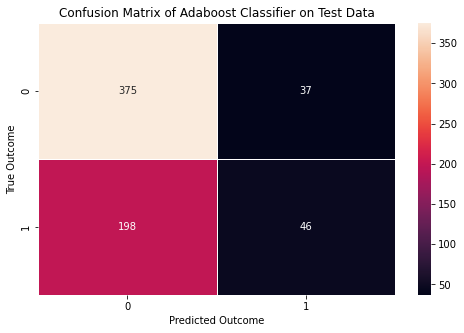

In [118]:
'''
Plot the confusion matrix so it is clearly labelled and illustrated.
'''
f, ax = plt.subplots(figsize = (8,5))
sns.heatmap(cm_adaboost, annot = True, linewidths = 0.5, fmt = ".0f", ax = ax)
plt.xlabel('Predicted Outcome')
plt.ylabel('True Outcome')
plt.title('Confusion Matrix of Adaboost Classifier on Test Data')
plt.show()

In [119]:
'''
Show the classification report for the test data.
'''
print(classification_report(y_test ,y_predictions_adaboost_test))

              precision    recall  f1-score   support

           0       0.65      0.91      0.76       412
           1       0.55      0.19      0.28       244

    accuracy                           0.64       656
   macro avg       0.60      0.55      0.52       656
weighted avg       0.62      0.64      0.58       656



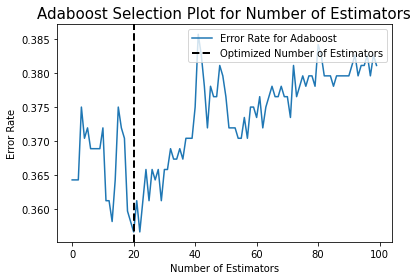

In [120]:
'''
Choose an optimal number of Estimatorsfor Adaboost by plotting the error rate for the model against the data.
'''
# Create an empty list for error rate.
error_rate_adaboost = []

# Create a for loop to get error rates appended to the error_rate list.
for i in np.arange(1, 101):

    new_model = AdaBoostClassifier(n_estimators = i)

    new_model.fit(X_train, y_train)

    new_predictions = new_model.predict(X_test)

    error_rate_adaboost.append(np.mean(new_predictions != y_test))
    
# Create the plot to assist with selecting a K value for the KNN classifier.
plt.plot(error_rate_adaboost, label = 'Error Rate for Adaboost')
plt.title("Adaboost Selection Plot for Number of Estimators", fontsize=15) 
plt.xlabel("Number of Estimators", fontsize=10)
plt.ylabel("Error Rate", fontsize=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.axvline(x=pd.Series(error_rate_adaboost).idxmin(), linewidth = 2, color = 'k', linestyle = '--',
            label = 'Optimized Number of Estimators')
plt.legend(loc = 'upper right')
plt.show()

In [121]:
'''
Show the optimum number of estimators on the plot above.
'''
print('Optimum Number of Estimators for AdaBoost Classifier:{}'.format(pd.Series(error_rate_adaboost).idxmin()))

Optimum Number of Estimators for AdaBoost Classifier:20


In [122]:
'''
Calculate the accuracy for the model based on training and test data. Also, report the
Precision, Recall, and F1 score for the model predications against the test data.
'''
accuracy_adaboost_train = accuracy_score(y_train, y_predictions_adaboost_train)
accuracy_adaboost_test = accuracy_score(y_test, y_predictions_adaboost_test)
precision_adaboost = precision_score(y_test, y_predictions_adaboost_test)
recall_adaboost = recall_score(y_test, y_predictions_adaboost_test)
f1_adaboost = f1_score(y_test, y_predictions_adaboost_test)
print("Accuracy of AdaBoost Model on training data is:{}".format(accuracy_adaboost_train))
print("Accuracy of AdaBoost Model on testing data is:{}".format(accuracy_adaboost_test))
print("Precision of SAdaBoostM Model on testing data is:{}".format(precision_adaboost))
print("Recall of AdaBoost Model on testing data is:{}".format(recall_adaboost))
print("F1 Score of AdaBoost Model on testing data is:{}".format(f1_adaboost))

Accuracy of AdaBoost Model on training data is:0.6339694656488549
Accuracy of AdaBoost Model on testing data is:0.6417682926829268
Precision of SAdaBoostM Model on testing data is:0.5542168674698795
Recall of AdaBoost Model on testing data is:0.1885245901639344
F1 Score of AdaBoost Model on testing data is:0.28134556574923547


### Summary of Findings from Analysis and Model Deployment Recommendation

In [123]:
'''
Create a dictionary summarizing the evaluation criteria for the six models.
'''
summary_data = OrderedDict([('Model', ['Logistic_Regression', 'KNN', 'Decision_Tree','Random_Forest', 'SVM', 'Adaboost']),
                           ('Model_Accuracy_Test',[accuracy_lr_test, accuracy_knn_test, accuracy_dt_test,
                                                  accuracy_rf_test, accuracy_svm_test,accuracy_adaboost_test]),
                            ('Model_Accuracy_Training',[accuracy_lr_train, accuracy_knn_train,accuracy_dt_train,
                                                      accuracy_rf_train, accuracy_svm_train, accuracy_adaboost_train]),
                           ('Model_Precision_Score',[precision_lr,precision_knn,precision_dt,
                                                    precision_rf,precision_svm,precision_adaboost]),
                           ('Model_Recall_Score',[recall_lr,recall_knn,recall_dt,
                                                 recall_rf,recall_svm,recall_adaboost]),
                           ('Model_F1_Score', [f1_lr,f1_knn,f1_dt,
                                               f1_rf,f1_svm,f1_adaboost]),])


In [124]:
'''
Display the summary evaluation metrics for the six models in a pandas dataframe.
Sort the Models based on accuracy for each model from the test dataset.
'''
summary_df = pd.DataFrame(summary_data, index = summary_data['Model'])
display(summary_df.sort_values(by = 'Model_Accuracy_Test', ascending = False))

,Model,Model_Accuracy_Test,Model_Accuracy_Training,Model_Precision_Score,Model_Recall_Score,Model_F1_Score
SVM,SVM,0.690549,0.737405,0.678261,0.319672,0.434540
KNN,KNN,0.664634,0.658015,0.693548,0.176230,0.281046
Random_Forest,Random_Forest,0.663110,1.000000,0.583942,0.327869,0.419948
Adaboost,Adaboost,0.641768,0.633969,0.554217,0.188525,0.281346
Decision_Tree,Decision_Tree,0.589939,1.000000,0.454874,0.516393,0.483685
Logistic_Regression,Logistic_Regression,0.509146,0.514504,0.375000,0.479508,0.420863


###  Cross-Validation Testing of the Model(s)

In [108]:
'''
Create a list of the models stored in a tuple along with the name.
'''
models = []
models.append(('Logistic_Regression', lr))
models.append(('KNN', knn))
models.append(('Decision_Tree', dt))
models.append(('Random_Forest', rf))
models.append(('SVM', svm))
models.append(('Adaboost', adaboost))

In [109]:
'''
Check the models on 20 splits using kfold cross-validation.
'''
cv_results = []
names = []

for name,model in models:
    kfold = StratifiedKFold(n_splits = 20)
    results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    cv_results.append(results)
    names.append(name)
    print('Model Type:{}, Average Accuracy Score: {}, Standard Deviation: {}'.format(name, 
                                                                                      round(results.mean(), 4), 
                                                                                      round(results.std(), 4)))

Model Type:Logistic_Regression, Average Accuracy Score: 0.4981, Standard Deviation: 0.0407
Model Type:KNN, Average Accuracy Score: 0.6443, Standard Deviation: 0.029
Model Type:Decision_Tree, Average Accuracy Score: 0.5943, Standard Deviation: 0.0288
Model Type:Random_Forest, Average Accuracy Score: 0.6645, Standard Deviation: 0.0275
Model Type:SVM, Average Accuracy Score: 0.6695, Standard Deviation: 0.032
Model Type:Adaboost, Average Accuracy Score: 0.6019, Standard Deviation: 0.0242


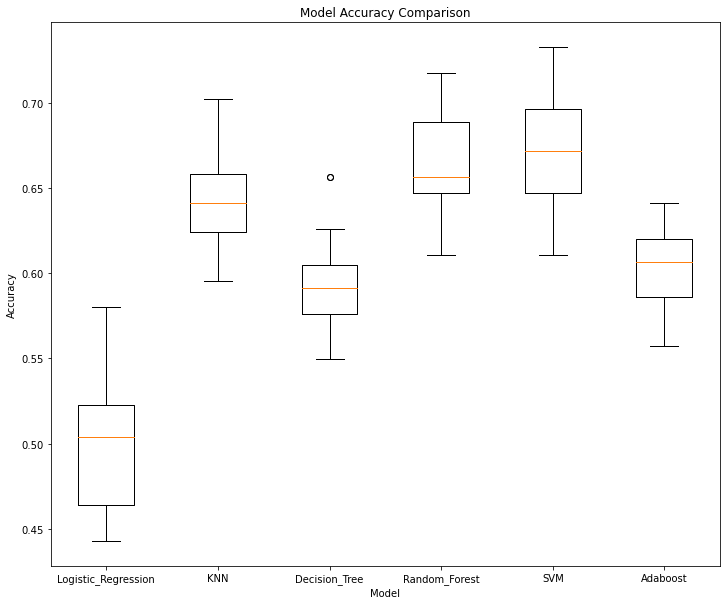

In [110]:
'''
Plot the model performance to show which models perform 
the most accurate along with which models have the most variation in accuracy.
'''
plt.figure(figsize = (12,10))
plt.boxplot(cv_results, labels = names)
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

The top three models are Support Vector Machine, Random Forest, and K-Nearest Neighbor. The boxplot above shows how each model scored with Cross-Validation over 20 iterations. Although the SVM Model performs the best overall, this model is not recommended to be deployed in the current state. It is recommended to check with domain experts for additional features to include in the dataset that may be higher correlated to water potability. This analysis served useful for understanding the water quality dataset and setting up a standard method for predictive modeling, however the SVM model is not recommended to be deployed at this point in time.